## READING THE DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/content/SOCR-HeightWeight.csv')
data

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


## DROPPING UNNECESSARY VALUES

In [ ]:
data=data.drop(['Index'],axis=1)
data

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [ ]:
data.isna().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

## SEPARATING X(INPUT) AND Y(OUTPUT) DATA

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x
y

0        112.9925
1        136.4873
2        153.0269
3        142.3354
4        144.2971
           ...   
24995    118.0312
24996    120.1932
24997    118.2655
24998    132.2682
24999    124.8742
Name: Weight(Pounds), Length: 25000, dtype: float64

## PLOTTING X AND Y

Text(0.5, 1.0, 'Height-Weight Graph')

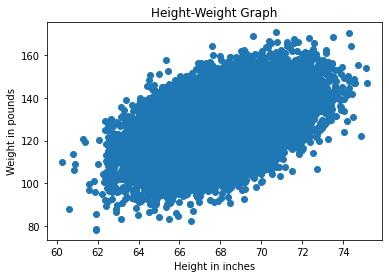

In [ ]:
plt.scatter(x,y)
plt.xlabel("Height in inches")
plt.ylabel("Weight in pounds")
plt.title("Height-Weight Graph")

## SPLITTING THE DATA AS TRAINING AND TESTING DATA

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


## IMPLEMENTING THE ALGORITHM

In [ ]:
from sklearn.linear_model import LinearRegression
line=LinearRegression()
line.fit(x_train,y_train)

prediction=line.predict(x_test)
prediction

print(line.predict([[165]]))

[424.72421817]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## PLOTTING THE RESULT

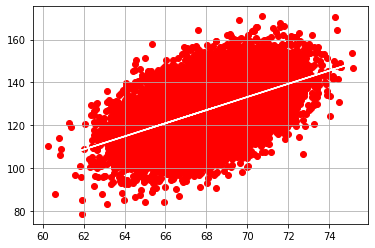

In [ ]:
plt.scatter(x_train,y_train,color='r')
plt.plot(x_test,prediction,color='w')
plt.grid()

In [ ]:
#slope(m)
print(line.coef_)
#constant(c)
print(line.intercept_)

[3.06852889]
-81.58304861164356


## DIFFERENCE BETWEEN ACTUAL AND PREDICTED VALUE(ERROR) 

In [ ]:
error=pd.DataFrame({'Actual Value':y_test,'Predicted Value':prediction})
error

,Actual Value,Predicted Value
6868,134.2855,128.379414
24016,111.9666,126.759722
9668,135.9871,126.031223
13640,126.3802,130.185305
14018,100.1810,130.177818
...,...,...
21156,125.6399,126.311655
24654,126.1776,127.273793
14592,126.4611,118.204725
20160,134.9922,133.610857


## PERFORMANCE EVALUATION

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,prediction))

from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,prediction))

from sklearn.metrics import r2_score
print(r2_score(y_test,prediction))

8.038079092885338
0.06435694448021587
0.25961263876058704
